## Basic imports

In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [10]:
%%R
 
# Import data with R
df <- read_csv('merged_food_access_data.csv', show_col_types = FALSE)
df

# A tibble: 4,870 × 152
       GEOID State County Urban Pop2010 Housing_Units GroupQuartersFlag NUMGQTRS
       <dbl> <chr> <chr>  <dbl>   <dbl>         <dbl>             <dbl>    <dbl>
 1   3.60e10 New … Alban…     1    2139           784                 0       79
 2   3.60e10 New … Alban…     1    6046          2514                 0       84
 3   3.60e10 New … Alban…     1    5888          2581                 0      193
 4   3.60e10 New … Alban…     1    2227          1017                 0      575
 5   3.60e10 New … Alban…     1    4415          2196                 0       15
 6   3.60e10 New … Alban…     1    5203            12                 1     5177
 7   3.60e10 New … Alban…     1    3412          1559                 0      117
 8   3.60e10 New … Alban…     1    3448           872                 0     1660
 9   3.60e10 New … Alban…     1    3676          1409                 0      143
10   3.60e10 New … Alban…     1    3821          1413                 0       14
# ℹ 

In [11]:
# Import data in python
df = pd.read_csv('merged_food_access_data.csv')
df.head()

,GEOID,State,County,Urban,Pop2010,Housing_Units,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,Low_Income_1and10,...,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP,NAME,Population,Median Income,No Computer,No Internet
0,36001000100,New York,Albany County,1,2139,784,0,79.0,3.69,1,...,9.0,173.0,198.0,179.0,276.0,"Census Tract 1, Albany County, New York",2035.0,32389.0,126.0,83.0
1,36001000200,New York,Albany County,1,6046,2514,0,84.0,1.39,1,...,12.0,490.0,648.0,895.0,960.0,"Census Tract 2, Albany County, New York",4793.0,27714.0,421.0,214.0
2,36001000300,New York,Albany County,1,5888,2581,0,193.0,3.28,1,...,19.0,515.0,615.0,708.0,554.0,"Census Tract 3, Albany County, New York",6147.0,45272.0,335.0,281.0
3,36001000401,New York,Albany County,1,2227,1017,0,575.0,25.82,0,...,2.0,43.0,53.0,139.0,5.0,"Census Tract 4.01, Albany County, New York",2362.0,74274.0,140.0,143.0
4,36001000403,New York,Albany County,1,4415,2196,0,15.0,0.34,0,...,5.0,153.0,201.0,437.0,286.0,"Census Tract 4.03, Albany County, New York",4253.0,74426.0,308.0,304.0


1. Write the null and alternative hypothesis
2. Make a chart of the distributions you’re comparing
3. Run the t-test or chi-squared test
4. Interpret the result

### Question 1: Do low-access tracts (discrete variable) tend to have more black population share (continuous variable)?
- Null Hypothesis: There is no difference between low-access (LA1and10=1) tracts and non-low-income (LA1and10=0) tracts in terms of their black population share (lablack1share)
- Alternative Hypothesis: There is a difference

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 2769 rows containing missing values (`geom_point()`). 



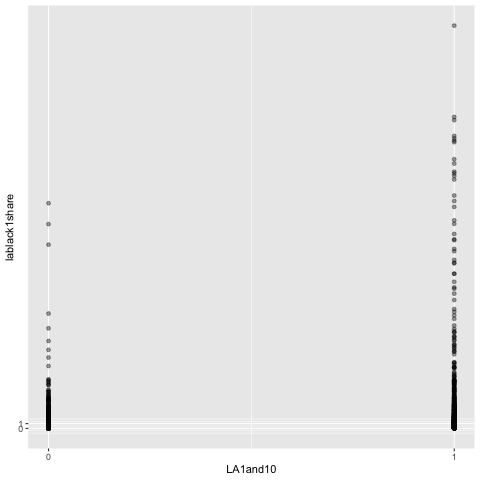

In [20]:
%%R
# plot LA1and10 with lablack1share in terms of their distribution and only show =0 and =1
df %>% 
  ggplot(aes(x = LA1and10, y = lablack1share)) +
  geom_point(alpha=.4) +
  scale_x_continuous(breaks = c(0, 1)) +
  scale_y_continuous(breaks = c(0, 1)) +
  labs(x = 'LA1and10', y = 'lablack1share')


In [5]:
%%R
# Conduct a T-test in R for "lablack1share" for "LA1and10"=1 and "LA1and10"=0
t.test(df$lablack1share ~ df$LA1and10, var.equal=TRUE)

	Two Sample t-test

data:  df$lablack1share by df$LA1and10
t = -10.424, df = 2099, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -3.563734 -2.435146
sample estimates:
mean in group 0 mean in group 1 
       1.023943        4.023383 



In [6]:
# plot the t-test data


### Result: there is a significant difference in the proportion of black residents in low income tracts and non-low income tracts

========================================================================================================

### Question 2: Do low-access tracts with more than 80% white population (lawhite1share>0.8) tend to have vehicle access (HUNVFlag=0)?
- Null hypothesis: there is no difference interms of white populationbetween low-vehicle access tracts and tracts with vehicle access 
- Alternative: there is a difference

In [7]:
%%R
# filter the data for LA1and10=1
df_low_access <- df %>% filter(LA1and10==1)
df_low_access


# A tibble: 937 × 152
       GEOID State County Urban Pop2010 Housing_Units GroupQuartersFlag NUMGQTRS
       <dbl> <chr> <chr>  <dbl>   <dbl>         <dbl>             <dbl>    <dbl>
 1   3.60e10 New … Alban…     1    2139           784                 0       79
 2   3.60e10 New … Alban…     1    6046          2514                 0       84
 3   3.60e10 New … Alban…     1    5888          2581                 0      193
 4   3.60e10 New … Alban…     1    2227          1017                 0      575
 5   3.60e10 New … Alban…     1    5203            12                 1     5177
 6   3.60e10 New … Alban…     1    6579          3246                 0      105
 7   3.60e10 New … Alban…     1    3816          1973                 0       16
 8   3.60e10 New … Alban…     1    6545          2852                 0      181
 9   3.60e10 New … Alban…     1    2430          1111                 0        0
10   3.60e10 New … Alban…     1    4277          1815                 0       15
# ℹ 92

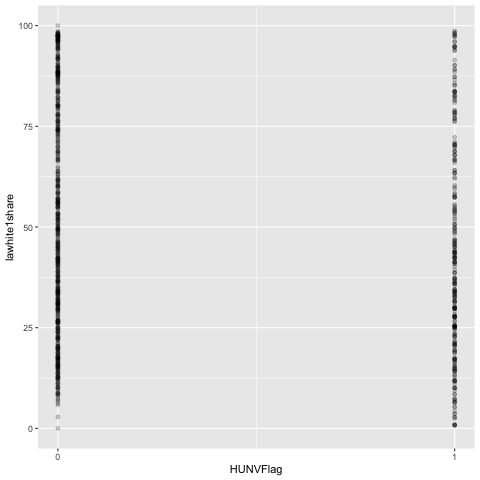

In [25]:
%%R
# plot the distribution of lawhite1share for HUNVFlag=0 and HUNVFlag=1
df_low_access %>% 
  ggplot(aes(x = HUNVFlag, y = lawhite1share)) +
  geom_point(alpha=.2) +
  scale_x_continuous(breaks = c(0, 1)) +
  labs(x = 'HUNVFlag', y = 'lawhite1share')


In [13]:
%%R

# in df_low_access, conduct a T-test for "lawhite1share" for "HUNVFlag=0" and "HUNVFlag=1"
t.test(df_low_access$lawhite1share ~ df_low_access$HUNVFlag)



	Welch Two Sample t-test

data:  df_low_access$lawhite1share by df_low_access$HUNVFlag
t = 4.4769, df = 638.53, p-value = 8.97e-06
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
  4.703596 12.053851
sample estimates:
mean in group 0 mean in group 1 
       51.79356        43.41484 



### Result: The p-value is less than 0.05, so we reject the null hypothesis that the two groups have no difference.
### White populated (>80%) low-acess tracts tend to have a difference in terms of vehicle access